<a href="https://colab.research.google.com/github/lucila-03/Acidente/blob/main/MVP2INSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP para Análise de Informações do INSS
## Lucila da Conceição Castello Branco


O que não está detalhado ou pode ser melhorado neste notebook para ficar como esperamos para o MVP:
- Blocos de texto que expliquem textualmente cada etapa e cada decisão do seu código, contando uma história completa e compreensível, do início ao fim;
- Boas práticas de codificação;
- Após cada gráfico, escrever 1 parágrafo resumindo os principais achados, analisando os resultados e levantando eventuais pontos de atenção.

## 1. Definição do Problema *

O dataset usado neste projeto será um arquivo do governo com informações da Comunicação de Acidentes de Trabalho (CAT), são somente as informações que governo disponibiliza, o arquivo estava guardado e foi modificado para ter somente informações relevantes para análise de acidentes de Janeiro e Fevereiro de 2019. O objetivo deste projeto é conhecer os tipos de acidentados em janeiro e fevereiro de 2019.

**Informações sobre os atributos:**
1. **Data Acidente** - Mês e ano da ocorrência
2. **Parte Corpo** - parte do corpo lesionado
3. **Sexo** - Masculino / Feminino
4. **Tipo de acidente** - Os acidentes são classificados conforme o tipo de ocorrência, pode ser típicos ( quando ocorreu na execução do trabalho) ou trajeto ( em deslocamento entre trabalho e casa ou deslocamento no almoço)
5. **UF  Munic.  Acidente** - localização(Estado) que o funcionário estava quando se acidentou.
6. **UF Munic. Empregador** - localização(Estado) que a empresa trabalha
7. **Idade** - idade (anos) do acidentado no dia so acidente

In [ ]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from pandas.core.dtypes.common import is_int64_dtype
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 2. Carga de Dados

In [ ]:
# Carrega arquivo csv usando Pandas usando uma URL

# Importação do dataset

url = "https://raw.githubusercontent.com/lucila-03/Acidente/main/dataset%20cat.csv"
dataset = pd.read_csv(url, delimiter = ";", encoding='ISO-8859-1' )


## 3. Análise de Dados e tratamento

Será realizado um levantamento dos tipos de dados, análise e ajustes para que a base de dados fique pronta para o estudo.

In [ ]:
# Mostra as dimensões do dataset
dataset.shape

(77985, 7)

In [ ]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77985 entries, 0 to 77984
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data Acidente         77985 non-null  object
 1   Parte Corpo Atingida  77985 non-null  object
 2   Sexo                  77985 non-null  object
 3   Tipo do Acidente      77985 non-null  object
 4   UF  Munic.  Acidente  54146 non-null  object
 5   UF Munic. Empregador  77985 non-null  object
 6   Idade                 77985 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 4.2+ MB


Foi identificado que algumas colunas precisam mudar de atributo.

In [ ]:
# Alterar atributo para data
dataset['Data Acidente'] = pd.to_datetime(dataset['Data Acidente'])


Para dar andamento ao projeto é necessario trocar todas as opções para números.

In [ ]:
# Faz o levantamento de todas as opções das colunas

#for column in pd.DataFrame(dataset).columns:
   # unique_options = pd.DataFrame(dataset)[column].unique()
  #  print(f"Coluna '{column}':")
   # print(unique_options)
 #   print()

In [ ]:
#Alterar atributo Parte Corpo Atingida



In [ ]:
#Alterar tipo de acidente

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77985 entries, 0 to 77984
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data Acidente         77985 non-null  datetime64[ns]
 1   Parte Corpo Atingida  77985 non-null  object        
 2   Sexo                  77985 non-null  object        
 3   Tipo do Acidente      77985 non-null  object        
 4   UF  Munic.  Acidente  77985 non-null  object        
 5   UF Munic. Empregador  77985 non-null  object        
 6   Idade                 77985 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 4.2+ MB


In [ ]:
# Mostra as 5 primeiras linhas do dataset
dataset.head(5)

,Data Acidente,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Idade
0,2019/01,Dedo,Feminino,Típico,NaN,Espírito Santo,23
1,2019/01,Antebraco (Entre O P,Masculino,Típico,NaN,Rio Grande do Sul,26
2,2019/01,Dorso (Inclusive Mus,Feminino,Trajeto,Pará,Pernambuco,35
3,2019/01,Dedo,Feminino,Típico,Rondônia,Minas Gerais,30
4,2019/01,"Face, Partes Multipl",Feminino,Típico,NaN,Rio Grande do Sul,32


Foi identificado que os Estados dos acidentados apresentam inconsistências que precisam ser tratadas.

In [ ]:
# Função personalizada para substituir os dados sem informação
dataset['UF  Munic.  Acidente'] = dataset['UF  Munic.  Acidente'].fillna(dataset['UF Munic. Empregador'])

dataset.head(5)

,Data Acidente,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Idade
0,2019/01,Dedo,Feminino,Típico,Espírito Santo,Espírito Santo,23
1,2019/01,Antebraco (Entre O P,Masculino,Típico,Rio Grande do Sul,Rio Grande do Sul,26
2,2019/01,Dorso (Inclusive Mus,Feminino,Trajeto,Pará,Pernambuco,35
3,2019/01,Dedo,Feminino,Típico,Rondônia,Minas Gerais,30
4,2019/01,"Face, Partes Multipl",Feminino,Típico,Rio Grande do Sul,Rio Grande do Sul,32


Vamos agora verificar se o dataset tem as classes balanceadas para que possamos tratar o desbalanceamento posteriormente, se necessário. Veremos que as classes 0 (não ocorrência de diabetes) e 1 (ocorrência de diabetes) estão desbalanceadas. Vamos guardar esta informação, pois possivelmente precisaremos realizar algum tipo de tratamento nas próximas etapas.

O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo do dataset.

Veremos que muitos dos atributos têm uma distribuição distorcida. Uma transformação como a Box-Cox, que pode aproximar a distribuição de uma Normal, pode ser útil neste caso.

Vamos agora trabalhar com boxplots. No **boxblot**, a linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

*OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.*

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.

### 3.3. Visualizações Multimodais

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que parece haver alguma estrutura na ordem dos atributos. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos

Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A **covariância** representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:
* Próximo de -1 : há uma correlação negativa entre as variáveis,
* Próximo de +1: há uma correlação positiva entre as variáveis.
* 0: não há correlação entre as variáveis.

<i>OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.</i>

Falamos anteriormente da importância da correlação entre os atributos, e agora iremos visualizar esta informação em formato gráfico. A **matriz de correlação** exibe graficamente a correlação entre os atributos numéricos do dataset.estão mais distantes um do outro na ordenação.

O código a seguir exibe a matriz de correlação.

Por sua vez, o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

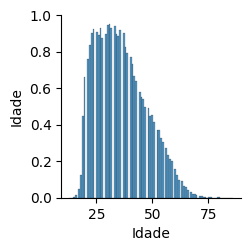

In [ ]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(dataset)

## 4. Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.1. Tratamento de Missings e Limpeza

Sabemos que o datset Diabetes não tem missings aparentes, mas valores "0" que parecem ser missings. Vamos então fazer este tratamento e criar uma nova visão do nosso dataset.

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

In [ ]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = dataset[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [ ]:
# removendo as colunas 'skin' e 'test'
atributos.drop(['skin', 'test'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [ ]:
# substituindo os NaN de 'preg' por 0
atributos['preg'].fillna(0, inplace=True)

# substituindo os NaN de 'plas', 'pres'e 'mass' pela mediana da coluna
atributos['plas'].fillna(atributos['plas'].median(), inplace=True)
atributos['pres'].fillna(atributos['pres'].median(), inplace=True)
atributos['mass'].fillna(atributos['mass'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [ ]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# incluindo a coluna 'class' no novo dataset
datasetSemMissings['class'] = dataset['class']

# exibindo as primeiras linhas
datasetSemMissings.head()

### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split, já explicada anteriormente. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.


# Nova seção

In [ ]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = dataset.values
X = array[:,0:8]
y = array[:,8]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [ ]:
# Separação em conjuntos de treino e teste (dataset sem missings - 2 colunas a menos!)
array = datasetSemMissings.values
X_sm = array[:,0:6]
y_sm = array[:,6]
#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação